In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR)

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
def answer_zero():
    return len(cancer['feature_names'])

In [6]:
len(cancer['feature_names'])

30

In [7]:
def answer_one():
    data1 = np.c_[cancer.data, cancer.target]
    columns1 = np.append(cancer.feature_names, ["target"])
    index1 = pd.RangeIndex(start=0, stop=569, step=1)
    return pd.DataFrame(data = data1, columns = columns1, index = index1)
#answer_one()

In [8]:
#This function should return a Series named target of length 2 
# with integer values and index = ['malignant', 'benign']
cancerdf = answer_one()
malig = np.sum(cancerdf['target'] == 1)
beni = np.sum(cancerdf['target'] == 0)
target = dict(zip(['malignant', 'benign'], [malig, beni]))
#target

In [9]:
def answer_two():
    cancerdf = answer_one()
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = "malignant benign".split()
    return counts
#answer_two()

In [10]:
def answer_three():
    cancerdf = answer_one()
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    return X, y

In [11]:
from sklearn.model_selection import train_test_split
def answer_four():
    X, y = answer_three()
    return train_test_split(X, y, train_size=426, test_size=143, random_state=0)
#answer_four()

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train, y_train)
    return knn

In [13]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    knn = answer_five()
    return knn.predict(means)

In [14]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.predict(X_test)

In [15]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    return knn.score(X_test, y_test)

In [16]:
def accuracy_plot():
    import matplotlib.pyplot as plt
    #%matplotlib notebook
    X_train, X_test, y_train, y_test = answer_four()
    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]

    plt.figure()
    plt.show()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

<Figure size 432x288 with 0 Axes>

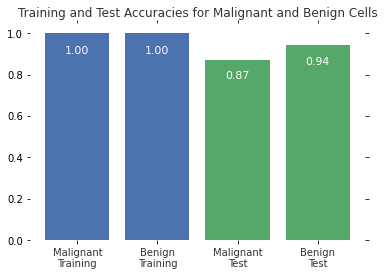

In [17]:
accuracy_plot()